<a href="https://colab.research.google.com/github/brnn1/CSST_102/blob/main/3A_DELFIN_EXER4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from pgmpy.models import BayesianModel
from pgmpy.inference import BeliefPropagation
from pgmpy.inference import VariableElimination
from pgmpy.factors.discrete import TabularCPD

In [ ]:
model =  BayesianModel([('Weather','Traffic'),('Traffic','Late')])

In [ ]:
cpd_weather = TabularCPD(variable= 'Weather', variable_card= 2,
                         values=[[0.8],[0.2]])

cpd_traffic = TabularCPD(variable= 'Traffic', variable_card= 2,
                         values=[[0.9, 0.5],[0.1,0.5]],
                         evidence=['Weather'],
                         evidence_card=[2])

cpd_late = TabularCPD(variable= 'Late', variable_card= 2,
                         values=[[0.95, 0.4],[0.05,0.6]],
                         evidence=['Traffic'],
                         evidence_card=[2])

model.add_cpds(cpd_weather, cpd_traffic, cpd_late)

assert model.check_model()

In [ ]:
inference = VariableElimination(model)

result = inference.query(variables=['Late'], evidence={'Weather':1})
print(result)

+---------+-------------+
| Late    |   phi(Late) |
+=========+=============+
| Late(0) |      0.6750 |
+---------+-------------+
| Late(1) |      0.3250 |
+---------+-------------+


In [ ]:
data = pd.DataFrame({
    'Weather': np.random.choice([0,1], size=1000, p=[0.8, 0.2]),
    'Traffic': np.nan,
    'Late': np.nan
})

data.loc[data['Weather'] == 0, 'Traffic'] = np.random.choice(
    [0,1],
    size=data[data['Weather'] ==0].shape[0],
    p=[0.9, 0.1]
    )

data.loc[data['Weather']==1, 'Traffic'] = np.random.choice(
    [0,1],
    size=data[data['Weather'] == 1].shape[0],
    p=[0.5, 0.5]
)

data['Late'] = np.where(
    data['Traffic'] == 0,
    np.random.choice([0,1], size=data.shape[0], p=[0.95, 0.05]),
    np.random.choice([0,1], size=data.shape[0], p=[0.4, 0.6])
)


In [ ]:
from pgmpy.estimators import MaximumLikelihoodEstimator

model = BayesianModel([('Weather', 'Traffic'), ('Traffic', 'Late')])
model.fit(data, estimator=MaximumLikelihoodEstimator)

for cpd in model.get_cpds():
  print(cpd)

+------------+-------+
| Weather(0) | 0.804 |
+------------+-------+
| Weather(1) | 0.196 |
+------------+-------+
+--------------+--------------------+---------------------+
| Weather      | Weather(0)         | Weather(1)          |
+--------------+--------------------+---------------------+
| Traffic(0.0) | 0.9054726368159204 | 0.5051020408163265  |
+--------------+--------------------+---------------------+
| Traffic(1.0) | 0.0945273631840796 | 0.49489795918367346 |
+--------------+--------------------+---------------------+
+---------+----------------------+--------------------+
| Traffic | Traffic(0.0)         | Traffic(1.0)       |
+---------+----------------------+--------------------+
| Late(0) | 0.9552599758162031   | 0.4277456647398844 |
+---------+----------------------+--------------------+
| Late(1) | 0.044740024183796856 | 0.5722543352601156 |
+---------+----------------------+--------------------+


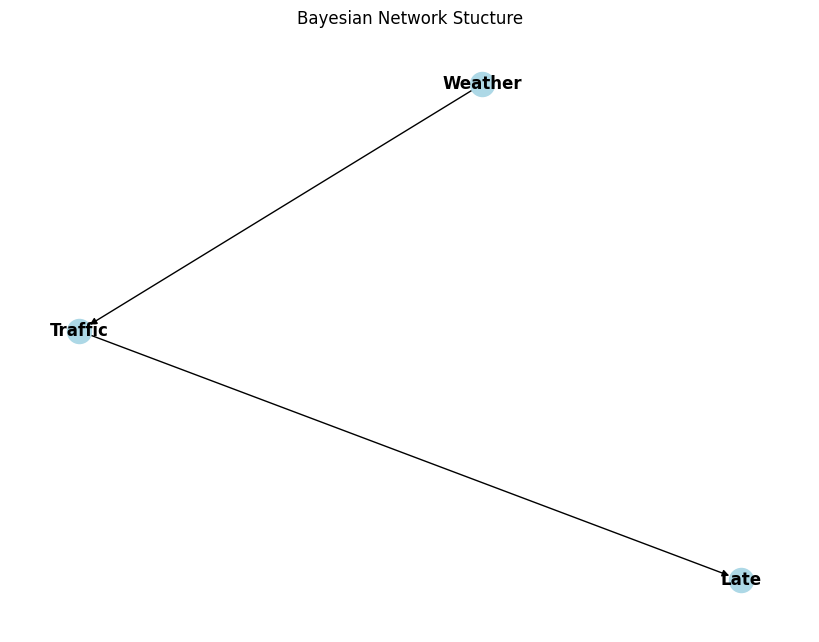

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

nx_graph = nx.DiGraph(model.edges)

plt.figure(figsize=(8,6))
pos = nx.spring_layout(nx_graph)
nx.draw(
    nx_graph, pos,
    with_labels= True, node_color='lightblue',
    font_weight='bold', arrows=True
)
plt.title('Bayesian Network Stucture')
plt.show()